In [1]:
import tensorflow as tf
from Dirichlet_BC_NN import *#Dirichlet_BC_NN, Dirichlet_BC_NN_2
from Lp_integral_norm import Lp_integral_norm
from generate_laplace_soln import generate_laplace_soln
import numpy as np
import matplotlib.pyplot as plt
#tf.enable_eager_execution()
tf.keras.backend.set_floatx('float64')

In [2]:
#mod = Dirichlet_BC_NN()
mod = Dirichlet_BC_NN_2(data_format = 'channels_first')
#mod = Dirichlet_BC_NN_3()

In [31]:
#from conv_laplacian_loss import conv_laplacian_loss
while True:
    b, soln, dx = generate_laplace_soln(batch_size=200, nonzero_boundaries=['left'], smoothness=np.random.randint(5,20), nx = np.random.randint(64,128), ny = np.random.randint(64,128))
    mod.x_output_resolution = soln.shape[-2]
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
    lf = Lp_integral_norm((soln.shape[-2], soln.shape[-1]), [0,soln.shape[-2] * dx, 0, soln.shape[-1] * dx], n_quadpts = 20, mse_component_weight = 1e+1)
    #cll = conv_laplacian_loss((soln.shape[-2], soln.shape[-1]))
    with tf.GradientTape() as tape:
        tape.watch(mod.trainable_variables)
        #loss = tf.reduce_sum(tf.losses.mean_squared_error(soln, mod([tf.expand_dims(b['left'], axis = 1),dx * tf.ones((soln.shape[0],1), dtype = 'float64')])))
        loss = lf(soln, mod(tf.expand_dims(b['left'], axis = 1)))
        #loss = tf.reduce_sum(tf.losses.mean_squared_error(soln, mod(tf.expand_dims(b['left'], axis = 1))))
    grads = tape.gradient(loss, mod.trainable_variables)
    optimizer.apply_gradients(zip(grads, mod.trainable_variables))
    print(loss)

tf.Tensor(0.26955151089152546, shape=(), dtype=float64)
tf.Tensor(0.21613420321998614, shape=(), dtype=float64)
tf.Tensor(0.07901436808473526, shape=(), dtype=float64)
tf.Tensor(0.15782647626590818, shape=(), dtype=float64)
tf.Tensor(0.32652531594857837, shape=(), dtype=float64)
tf.Tensor(0.4256926577583309, shape=(), dtype=float64)
tf.Tensor(0.2693661957121524, shape=(), dtype=float64)
tf.Tensor(0.1863512095985057, shape=(), dtype=float64)
tf.Tensor(0.22587400027487242, shape=(), dtype=float64)
tf.Tensor(0.12988770847418482, shape=(), dtype=float64)
tf.Tensor(0.07744979675755712, shape=(), dtype=float64)
tf.Tensor(0.4619992625299967, shape=(), dtype=float64)
tf.Tensor(0.08931051215243944, shape=(), dtype=float64)
tf.Tensor(0.17557174834926284, shape=(), dtype=float64)
tf.Tensor(0.2166634317068979, shape=(), dtype=float64)
tf.Tensor(0.03001741413326453, shape=(), dtype=float64)
tf.Tensor(0.245258006535124, shape=(), dtype=float64)
tf.Tensor(0.10535493589649358, shape=(), dtype=float64)

tf.Tensor(0.13749563967240264, shape=(), dtype=float64)
tf.Tensor(0.17741931373032901, shape=(), dtype=float64)
tf.Tensor(0.3590902325699415, shape=(), dtype=float64)
tf.Tensor(0.6468209237427491, shape=(), dtype=float64)
tf.Tensor(0.11736047472921687, shape=(), dtype=float64)
tf.Tensor(0.06798084979164729, shape=(), dtype=float64)
tf.Tensor(0.2046111559725314, shape=(), dtype=float64)
tf.Tensor(0.2220756644701055, shape=(), dtype=float64)
tf.Tensor(0.3582802199743934, shape=(), dtype=float64)
tf.Tensor(0.059469356686726885, shape=(), dtype=float64)
tf.Tensor(0.1680472930093026, shape=(), dtype=float64)
tf.Tensor(0.3496229566997091, shape=(), dtype=float64)
tf.Tensor(0.16737114636688727, shape=(), dtype=float64)
tf.Tensor(0.23850385526873605, shape=(), dtype=float64)
tf.Tensor(0.24221085260895783, shape=(), dtype=float64)
tf.Tensor(0.35994600806440114, shape=(), dtype=float64)
tf.Tensor(0.1895343546069456, shape=(), dtype=float64)
tf.Tensor(0.16017005856606584, shape=(), dtype=float64)

KeyboardInterrupt: 

In [4]:
mod.summary()

Model: "dirichlet_bc_nn_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
upsample2 (Upsample2)        multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  51000     
_________________________________________________________________
dense_1 (Dense)              multiple                  501000    
_________________________________________________________________
dense_2 (Dense)              multiple                  10010000  
_________________________________________________________________
upsample2_1 (Upsample2)      multiple                  0         
Total params: 10,562,000
Trainable params: 10,562,000
Non-trainable params: 0
_________________________________________________________________


In [15]:
print(mod(tf.expand_dims(b['left'], axis = 1)).shape)
print(b['left'].shape)

(100, 1, 82, 117)
(100, 117)


(82, 107)
(82, 107)


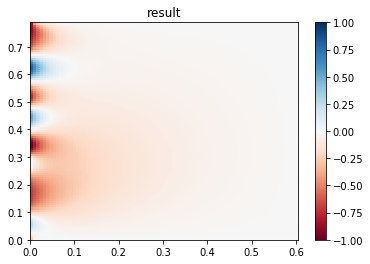

In [34]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
#z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

(82, 107)
(82, 107)


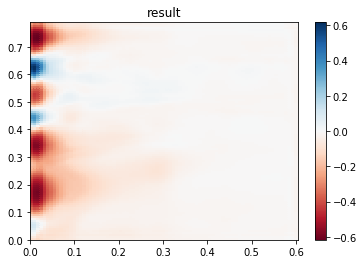

In [35]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
#z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
b['left'].shape

In [36]:
mod.save_weights('Dirichlet_BC_NN_2.h5')